In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
def leakage_coefficient(num, den):
    
    ci    = [ 0 for _ in range(len(num)) ]
    sigma = [ 0 for _ in range(len(num)) ]
    
    for i in range(len(ci)):
        
        if num[i] > 0 and den[i] > 0:
            
            ci[i]    = num[i]/den[i]
            sigma[i] = ci[i] * math.sqrt((1/num[i]) + (1/den[i]))
    
    return {'mean': ci, 'sigma': sigma}


def correlation_factor(Na, Nb, Ma, Mb):
   
    R     = [ 0 for _ in range(len(Na)) ]
    sigma = [ 0 for _ in range(len(Na)) ]
    
    for i in range(len(R)):
        
        if Na[i]>0 and Nb[i]>0 and Ma[i]>0 and Mb[i]>0:
            
            R[i]     = (Na[i]*Mb[i])/(Nb[i]*Ma[i])
            sigma[i] = R[i] * math.sqrt((1/Na[i]) + (1/Nb[i]) + (1/Ma[i]) + (1/Mb[i]))
            
            
    return {'mean': R, 'sigma': sigma}

def merge_slices(N, array):
    
    return_array = [0 for _ in range(len(array)//N)]
    
    for n in range(N):
        for i in range(len(return_array)):
        
            return_array[i] = return_array[i] + array[i*N + n]
    
    return return_array

def merge_years(csv_years):
    
    a = 36.2/140.
    d = 44.3/140.
    e = 58.5/140.
    

    for j in range(len(csv_years[0]['Na'])):

        csv_years[0]['Na'][j] = a*csv_years[0]['Na'][j] + d*csv_years[1]['Na'][j] + e*csv_years[2]['Na'][j]
        csv_years[0]['Nb'][j] = a*csv_years[0]['Nb'][j] + d*csv_years[1]['Nb'][j] + e*csv_years[2]['Nb'][j]
        csv_years[0]['Ma'][j] = a*csv_years[0]['Ma'][j] + d*csv_years[1]['Ma'][j] + e*csv_years[2]['Ma'][j]
        csv_years[0]['Mb'][j] = a*csv_years[0]['Mb'][j] + d*csv_years[1]['Mb'][j] + e*csv_years[2]['Mb'][j]
        
    csv_years[0]['Na'][3999] = 0
    csv_years[0]['Nb'][3999] = 0
    csv_years[0]['Ma'][3999] = 0
    csv_years[0]['Mb'][3999] = 0
    

    return csv_years[0]

In [3]:
def integral(array):
    
    return_array = [0 for _ in range(len(array))]
    
    for i in range(len(array)):
        for j in range(i, len(array)):
            return_array[i] = return_array[i] + array[j]
            
    return return_array

In [4]:
var = 'met'

dati = 'dati_selection'
directories = [dati+'/txt files 15-16', dati+'/txt files 17', dati+'/txt files 18']

_Wgamma     = []
_Zgamma     = []
_Znunugamma = []
_gammajets  = []
_Wjets      = []
_Zjets      = []
_data       = []



for directory in directories:

    _Wgamma.append(pd.read_csv(directory + '/Wgamma_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Zgamma.append(pd.read_csv(directory + '/Zgamma_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Znunugamma.append(pd.read_csv(directory + '/Znunugamma_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _gammajets.append(pd.read_csv(directory + '/gammajets_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))

    _Wjets.append(pd.read_csv(directory + '/Wjets_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    _Zjets.append(pd.read_csv(directory + '/Zjets_' + var + '.txt', sep='\t', names=['Na', 'Nb', 'Ma', 'Mb']))
    
Wgamma     = merge_years(_Wgamma)
Zgamma     = merge_years(_Zgamma)
Znunugamma = merge_years(_Znunugamma)
gammajets  = merge_years(_gammajets)
Wjets      = merge_years(_Wjets)
Zjets      = merge_years(_Zjets)   
    
    
    
signal = {'Wgamma': Wgamma,
          'Zgamma': Zgamma,
          'Znunugamma': Znunugamma,
          'gammajets': gammajets}

background = {'Wjets': Wjets,
              'Zjets': Zjets}

color = ['r', 'b', 'g', 'orangered']

for key in ['Zgamma', 'Znunugamma']:
    for n in ['Na', 'Nb', 'Ma', 'Mb']:
        signal[key][n][3999] = 0
    

Wgamma
Zgamma
Znunugamma
gammajets


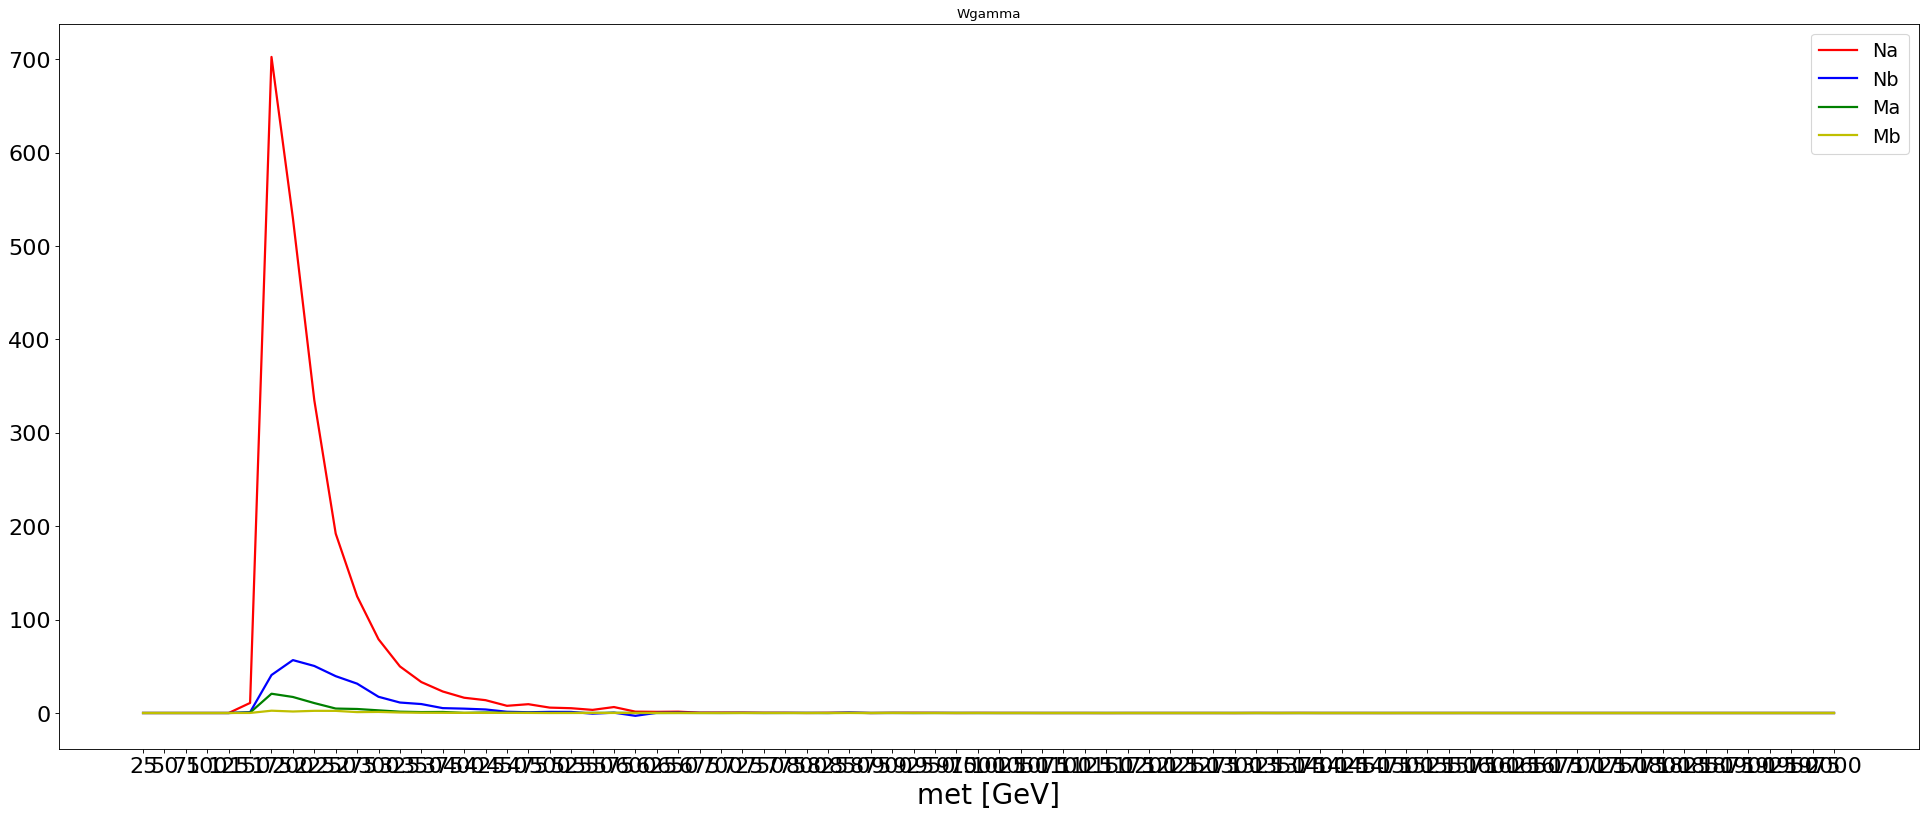

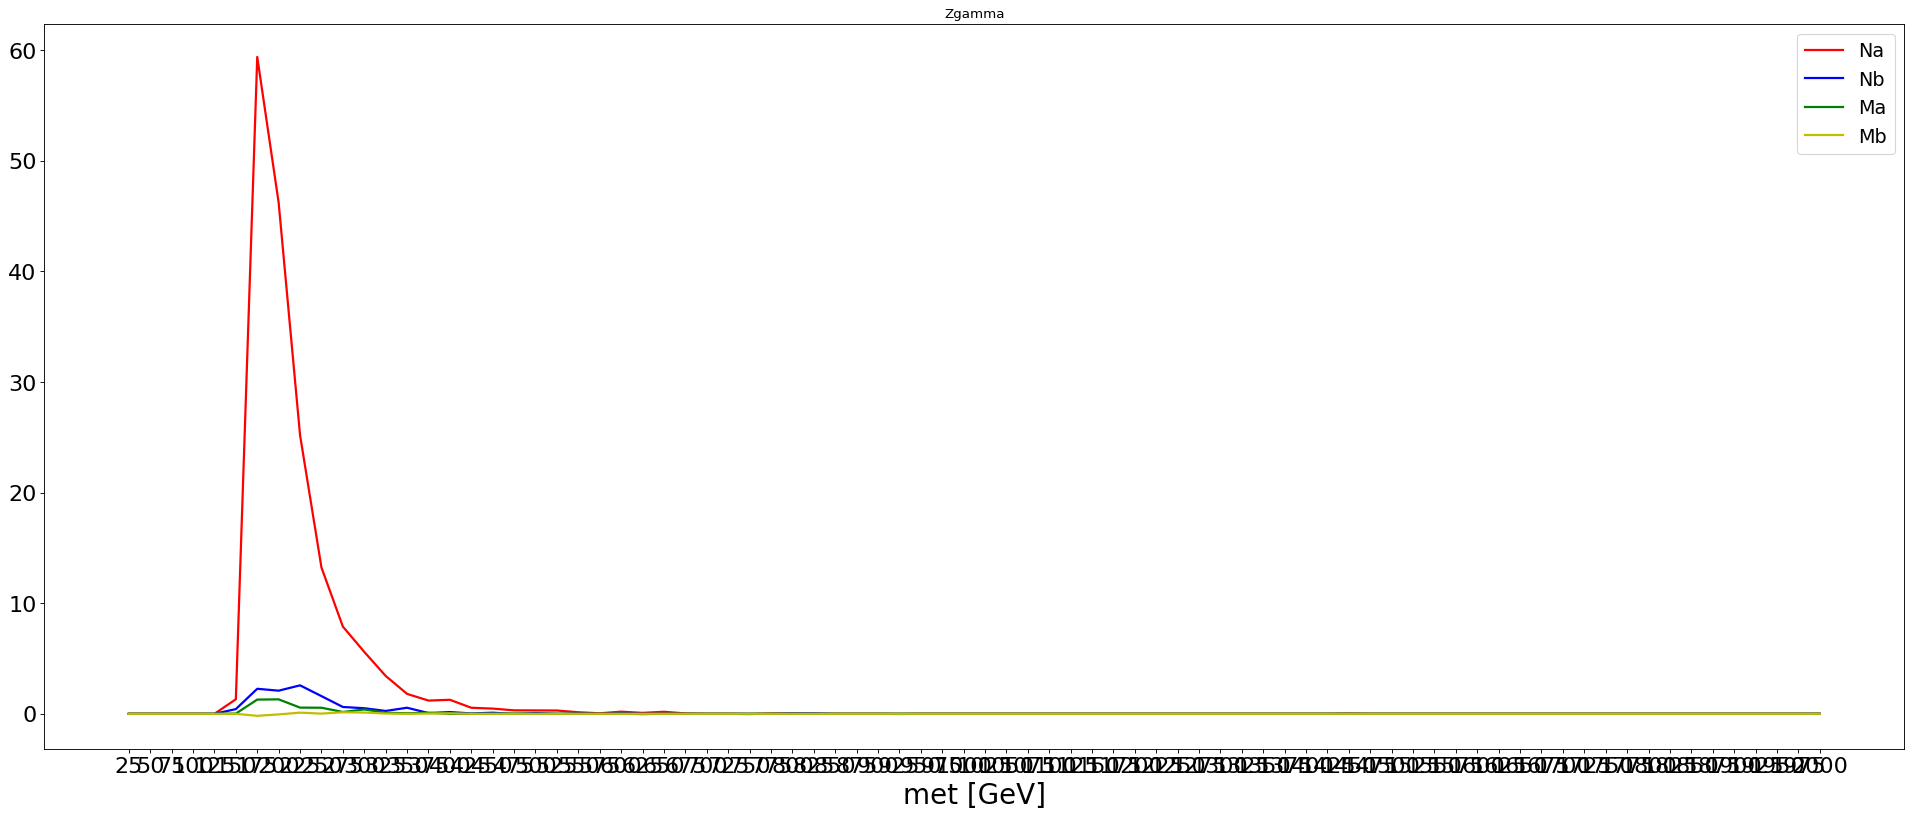

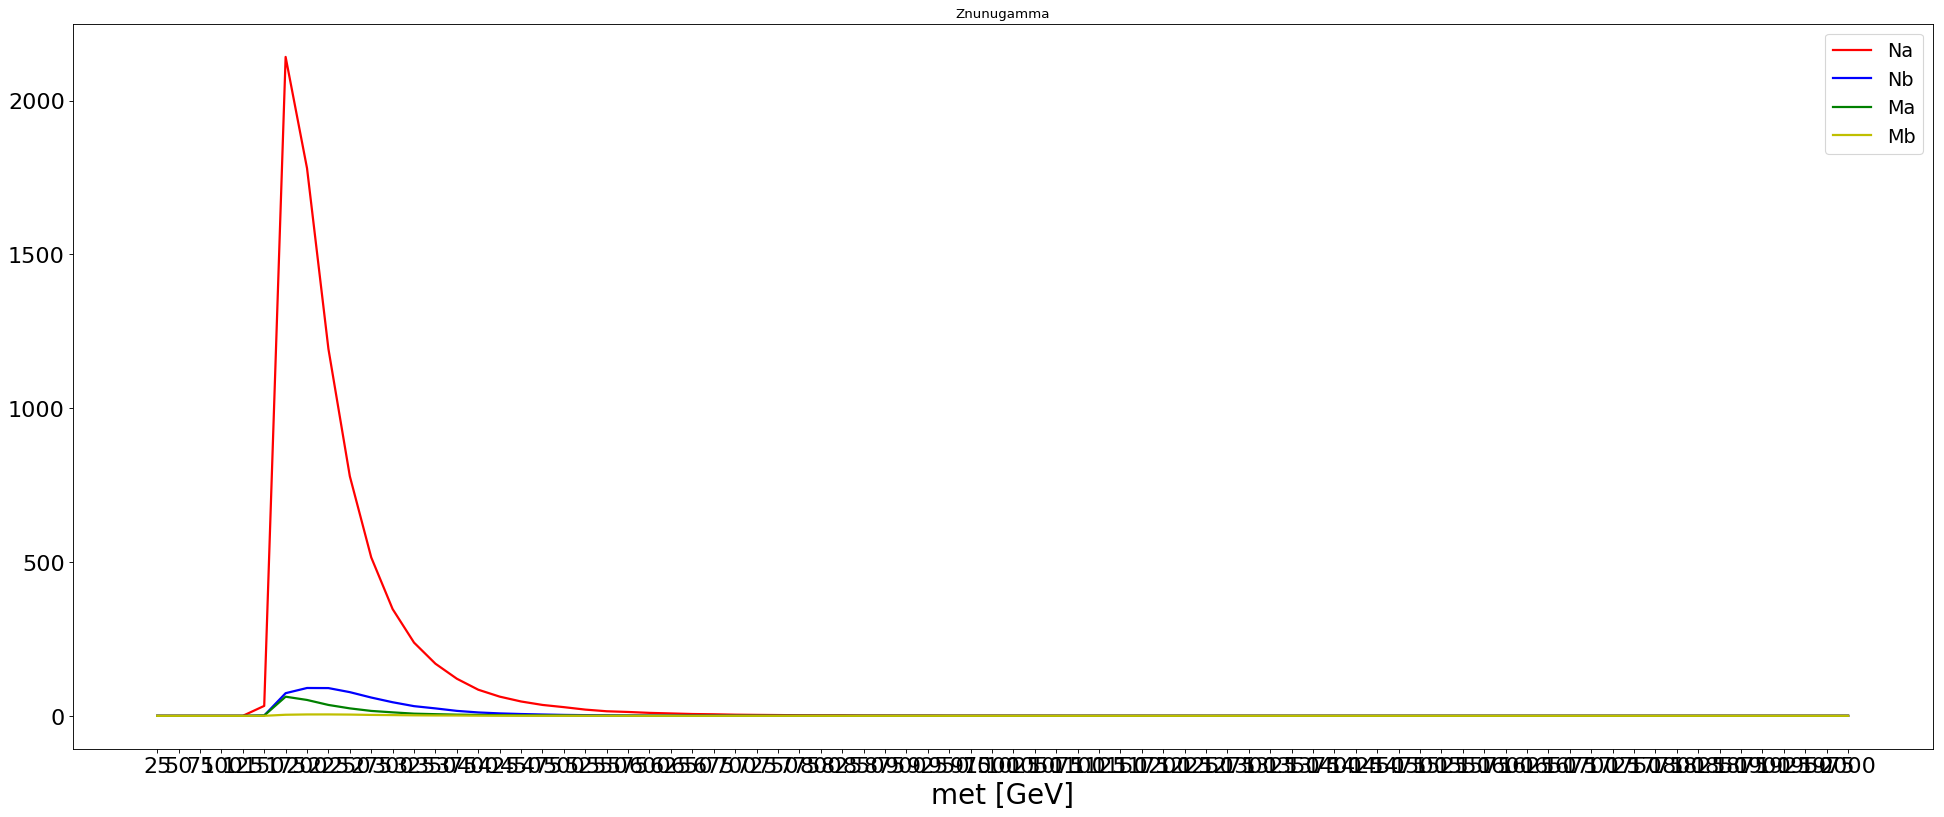

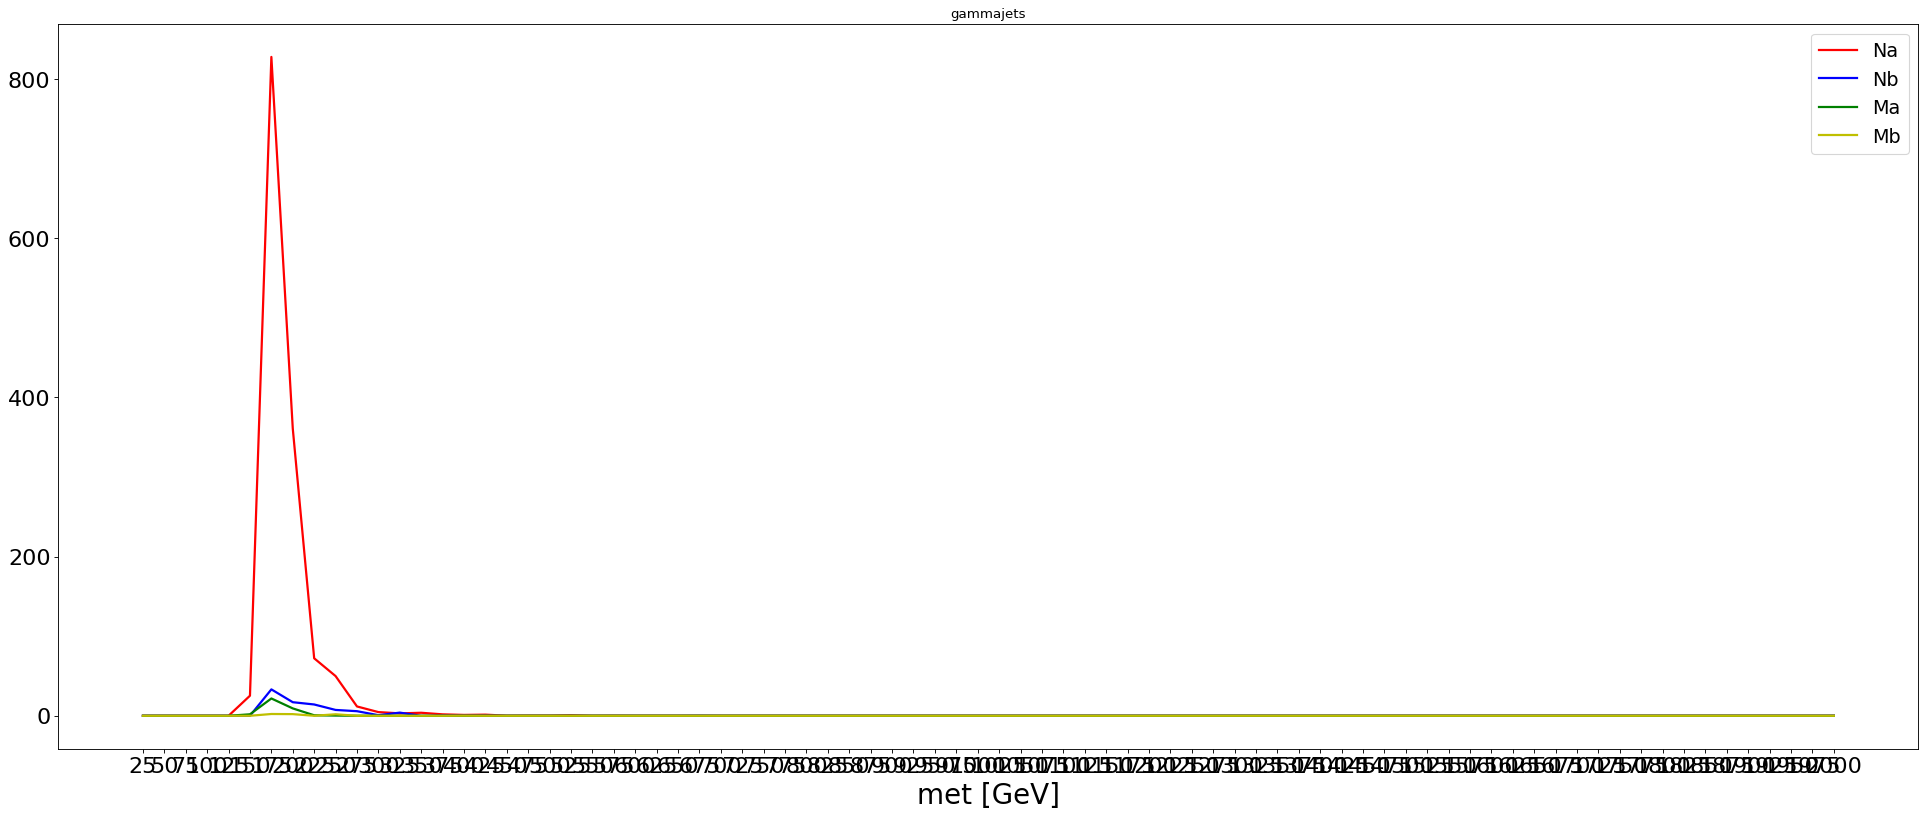

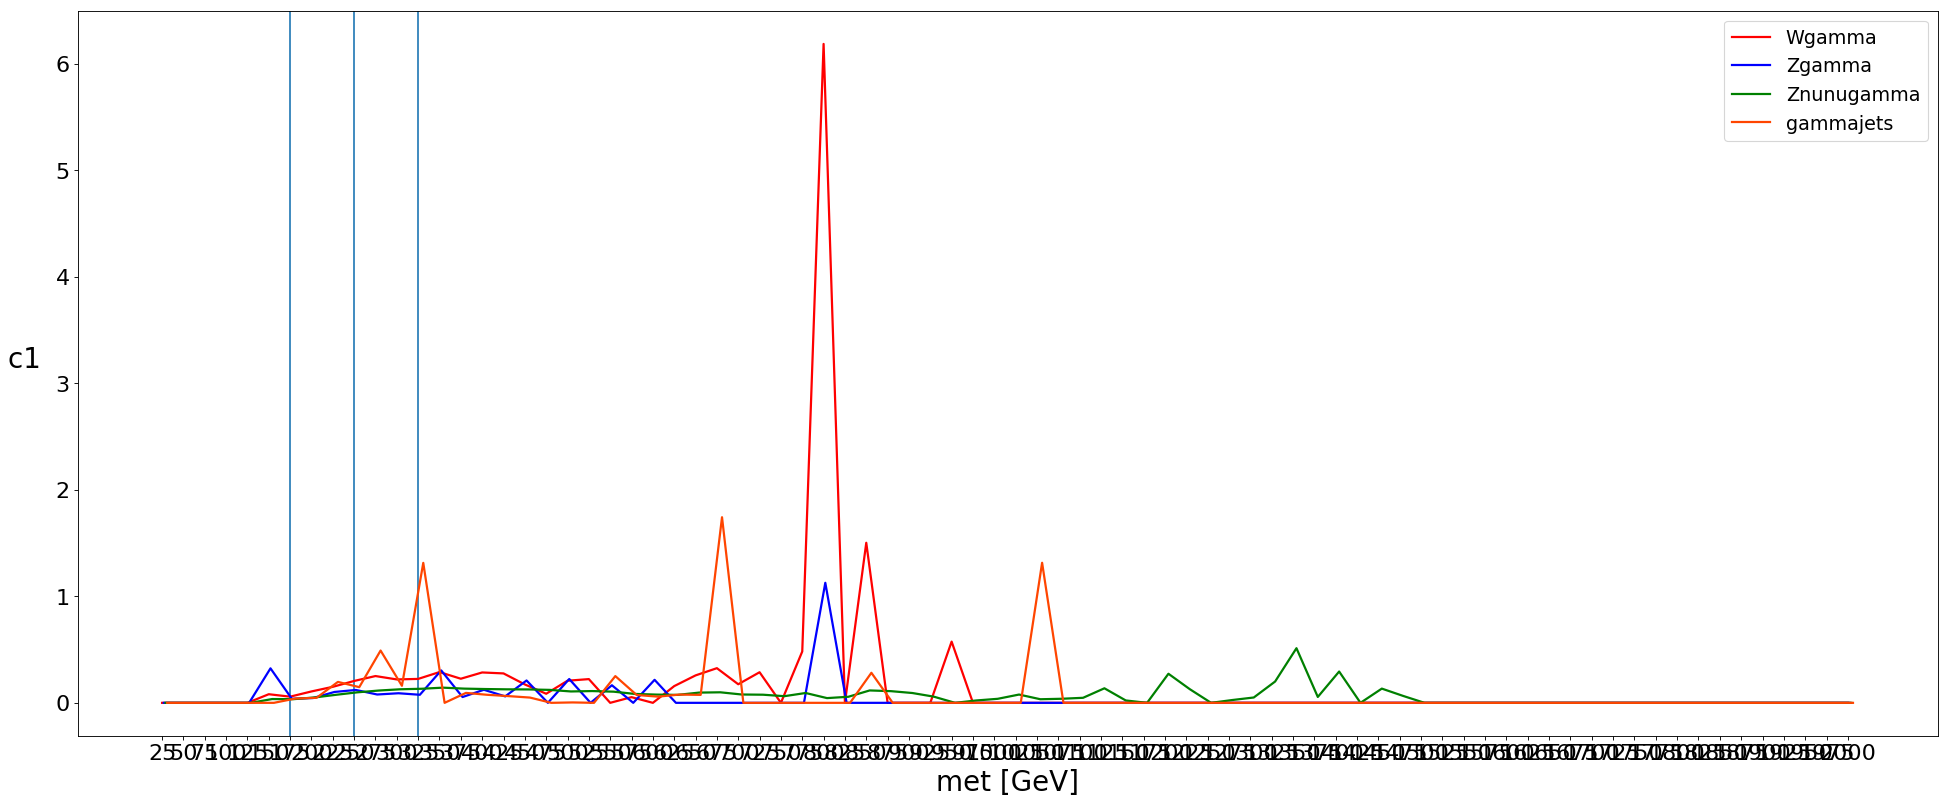

In [5]:
c1 = {}
c2 = {}
c3 = {}
N = 50

signal_ = ['Zgamma']
for key in signal:
   
    print(key)
    Na = merge_slices(N, signal[key]['Na'])
    Nb = merge_slices(N, signal[key]['Nb'])
    Ma = merge_slices(N, signal[key]['Ma'])
    Mb = merge_slices(N, signal[key]['Mb'])
    
    
    plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
    
    plt.errorbar([i for i in range(len(Na))], Na, fmt='r', marker='', linestyle='-', linewidth=2, label='Na')
    plt.errorbar([i for i in range(len(Na))], Nb, fmt='b', marker='', linestyle='-', linewidth=2, label='Nb')
    plt.errorbar([i for i in range(len(Na))], Ma, fmt='g', marker='', linestyle='-', linewidth=2, label='Ma')
    plt.errorbar([i for i in range(len(Na))], Mb, fmt='y', marker='', linestyle='-', linewidth=2, label='Mb')
    
    
    plt.yticks(fontsize=20)
    plt.xticks(range(len(Na)), [int((i+1)*2000/len(Na)) for i in range(len(Na))], fontsize=20)
    plt.xlabel(var + ' [GeV]', fontsize=25)
    plt.legend(fontsize='xx-large')
    plt.title(key)

    #plt.axvline(x=150*2/(N))
    #plt.axvline(x=225*2/(N))
    #plt.axvline(x=300*2/(N))
    
    
    
    #Na = integral(Na)
    #Nb = integral(Nb)
    #Ma = integral(Ma)
    #Mb = integral(Mb)
    
    c1.update({key: leakage_coefficient(Nb,Na)})
    c2.update({key: leakage_coefficient(Ma,Na)})
    c3.update({key: leakage_coefficient(Mb,Na)})
    
plt.figure(num=None, figsize=(30, 12), dpi=80, facecolor='w', edgecolor='k')
j=0
for key in signal:
    
    plt.errorbar([i+j*0.08 for i in range(len(c1[key]['mean']))], c1[key]['mean'], fmt=color[j], marker='', linestyle='-', linewidth=2, label=key) 
    j = j + 1
    
#plt.ylim([0, 0.5])
plt.yticks(fontsize=20)
plt.ylabel('c1      ', fontsize=25, rotation=0)
plt.xticks(range(len(c1['Wgamma']['mean'])), [int((i+1)*2000/len(c1['Wgamma']['mean'])) for i in range(len(c1['Wgamma']['mean']))], fontsize=20)
plt.xlabel(var + ' [GeV]', fontsize=25)
plt.legend(fontsize='xx-large')
#plt.yscale('log')

plt.axvline(x=150*2/(N))
plt.axvline(x=225*2/(N))
plt.axvline(x=300*2/(N))

